# Prepare Environment

Load necessary modules and attempt to compile the GrOpt library if it isn't already

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from timeit import default_timer as timer

# This attempts to re-compile the library in case it has been changed, mostly for debug, but won't do anything
# if nothing is changed
import subprocess
out = subprocess.run(["python", "setup.py", "build_ext", "--inplace"], stdout=subprocess.PIPE)
import gropt

from helper_utils_paper import *

%matplotlib inline

# Conventional Gradients
The gradient hardware and desired zero gradient moment dictate the shape (triangle vs. trapezoid) based on Equation 5

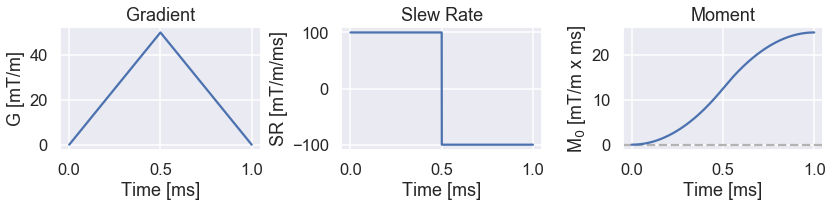

Maximum Gradient Amplitude = 50.00 mT/m
Zero Gradient Moment = 25.00 mT/m x ms
Gradient waveform duration = 1.00 ms


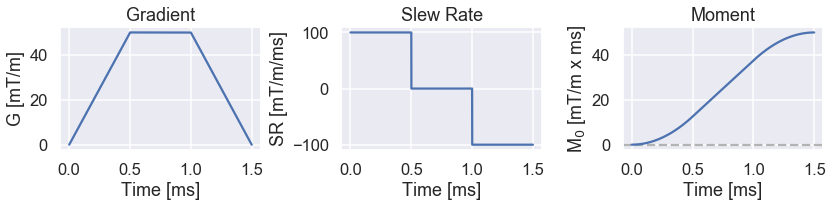

Maximum Gradient Amplitude = 50.00 mT/m
Zero Gradient Moment = 50.00 mT/m x ms
Gradient waveform duration = 1.50 ms


In [2]:
# Start of parameters to change
G_Max = 50     # Maximum gradient amplitude, mT/m
SR_Max = 100   # Maximum slew rate, mT/m/ms 
M0 = 25        # Desired zero gradient moment (area), mT/m x ms
dt = 10e-6     # Sampling rate, ms
# End of parameters to change

if M0 < G_Max**2/SR_Max:
    G = conventional_triangles(SR_Max, M0, dt)
else:
    G = conventional_trapezoids(G_Max, SR_Max, M0, dt)

mmt = plot_waveform_simple(G, dt, plot_moments = True, plot_eddy = False, plot_pns = False, plot_slew = True)
#plt.savefig('ConvTri.pdf')
plt.show(plot_waveform_simple)
print('Maximum Gradient Amplitude = %.2f mT/m' % np.max(G))
print('Zero Gradient Moment = %.2f mT/m x ms'  % (mmt[0][-1]))
print('Gradient waveform duration = %.2f ms'   % float(G.size*dt))


# Increasing M0 forces design to change from Triangle to Trapezoid based on Equation 5
M0 = 50

if M0 < G_Max**2/SR_Max:
    G = conventional_triangles(SR_Max, M0, dt)
else:
    G = conventional_trapezoids(G_Max, SR_Max, M0, dt)
    
mmt = plot_waveform_simple(G, dt, plot_moments = True, plot_eddy = False, plot_pns = False, plot_slew = True)
#plt.savefig('ConvTrap.pdf')
plt.show(plot_waveform_simple)
print('Maximum Gradient Amplitude = %.2f mT/m' % np.max(G))
print('Zero Gradient Moment = %.2f mT/m x ms'  % (mmt[0][-1]))
print('Gradient waveform duration = %.2f ms'   % float(G.size*dt))
    

# Optimized Gradients
The optimization determines the shape (triangle vs. trapezoid) inherently

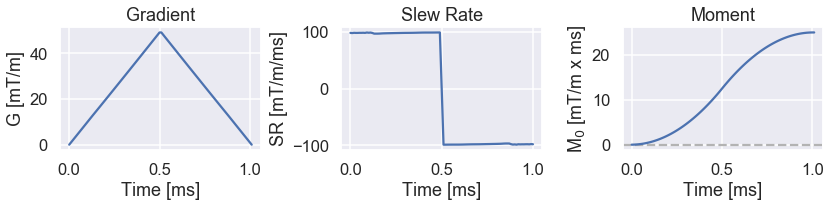

Maximum Gradient Amplitude = 49.10 mT/m
Zero Gradient Moment = 25.00 mT/m x ms
Gradient waveform duration = 1.02 ms


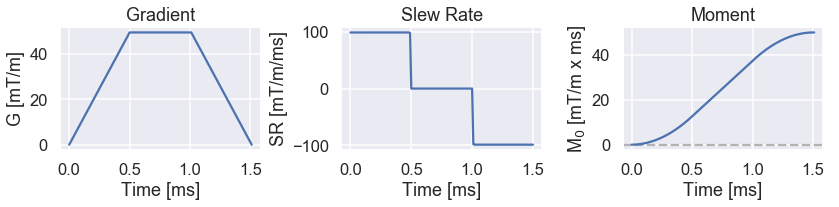

Maximum Gradient Amplitude = 49.50 mT/m
Zero Gradient Moment = 50.00 mT/m x ms
Gradient waveform duration = 1.52 ms


In [3]:
params = {}
params['mode'] = 'free'

# Start of parameters to change
M0 = 25                 # Desired zero gradient moment (area), mT/m x ms
params['gmax'] = 0.05   # Maximum gradient amplitude, G/cm
params['smax'] = 100.0  # Maximum slew rate, mT/m/ms 
params['dt'] = 10e-6    # Sampling rate, ms
minT = 0.1              # Minimum duration search, ms
maxT = 2.0              # Maximum duration search, ms
# End of parameters to change

params['moment_params']  = [[0, 0, 0, -1, -1, M0, 1.0e-3]]
G, T = get_min_TE_free(params, minT, maxT, verbose=0)
plot_waveform_simple(G*1000, params['dt']*1000, plot_moments = True, plot_slew = True, plot_pns = False, plot_eddy = False)
mmt = get_moment_plots(G, 0, dt, diffmode = 0)
#plt.savefig('CVXTri.pdf')
plt.show(plot_waveform)
print('Maximum Gradient Amplitude = %.2f mT/m' % np.max(G*1000))
print('Zero Gradient Moment = %.2f mT/m x ms'  % (mmt[0][-1]*1e6))
print('Gradient waveform duration = %.2f ms' % T)


# Increasing M0 automatically selects the time-optimal waveform shape
M0 = 50

params['moment_params']  = [[0, 0, 0, -1, -1, M0, 1.0e-3]]
G, T = get_min_TE_free(params, minT, maxT, verbose=0)
plot_waveform_simple(G*1000, params['dt']*1000, plot_moments = True, plot_slew = True, plot_pns = False, plot_eddy = False)
mmt = get_moment_plots(G, 0, dt, diffmode = 0)
#plt.savefig('CVXTrap.pdf')
plt.show(plot_waveform)
print('Maximum Gradient Amplitude = %.2f mT/m' % np.max(G*1000))
print('Zero Gradient Moment = %.2f mT/m x ms'  % (mmt[0][-1]*1e6))
print('Gradient waveform duration = %.2f ms' % T)

